In [27]:
library(tidyverse)
library("ggplot2")
library("dplyr")
library("reshape2")
library("knitr")
install.packages("e1071")
library(e1071)
library(mosaic)

dfSC = read.csv("CumulativeCases.csv", header = T)
dfSD = read.csv("TotalDeaths.csv", header = T)
dfCC = read.csv("CumulCases2020.csv")
dfCD = read.csv("TotalDeaths2020.csv")

dfW = read.csv("WHOselect.csv", header = T)

cumulSC = read.csv("Cumulative.csv")
totDLD = read.csv("TotalDeathsLD.csv")

dfC3 = read.csv("CulumNon-Interpolated2003.csv", header = T)
dfD3 = read.csv("DeathNon-Interpolated2003.csv", header = T)
dfR3 = read.csv("RecoveredNon-Interpolated2003.csv", header = T)

Skewness:  1.614755

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,9,36.5,206,236,7084,1120.571,2631.596,7,0


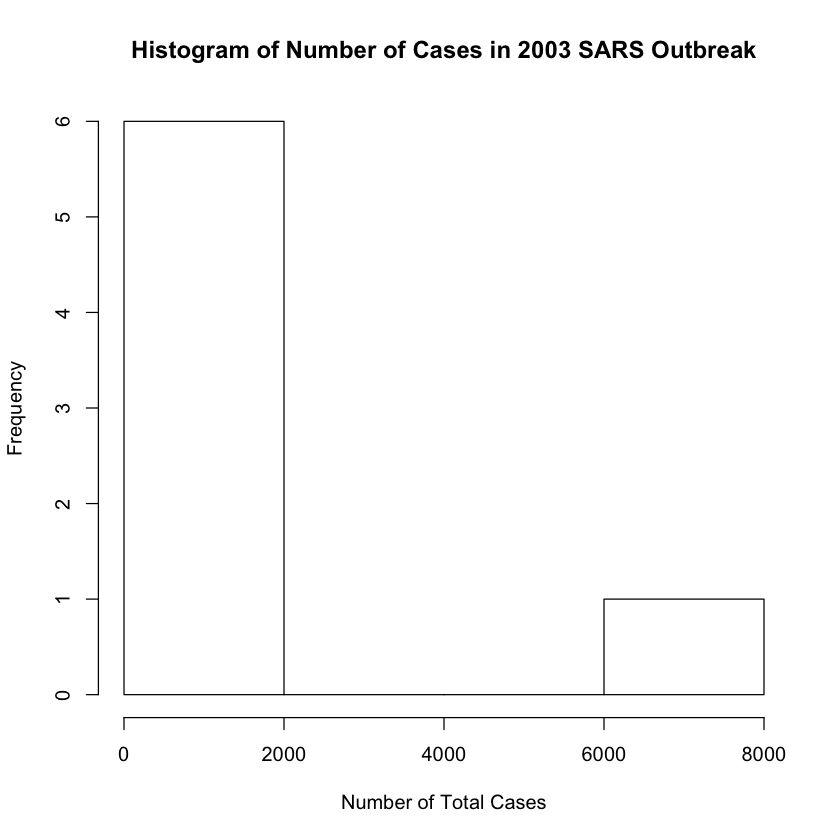

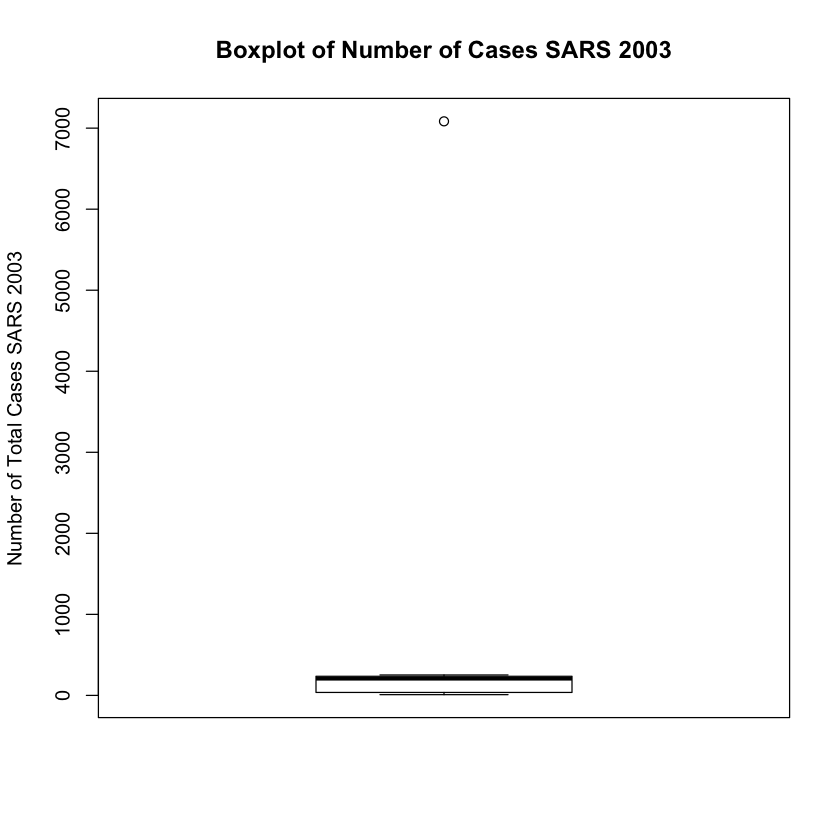

In [2]:
t2003 <- c(cumulSC$Canada.2003, cumulSC$Germany.2003, cumulSC$Italy.2003, cumulSC$Singapore.2003, cumulSC$US.2003, cumulSC$Vietnam.2003, cumulSC$China.2003)
hist(t2003, xlab ='Number of Total Cases', main = "Histogram of Number of Cases in 2003 SARS Outbreak")
skew <- skewness(t2003)
cat("Skewness: ", skew)

favstats(t2003)
boxplot(t2003, ylab = "Number of Total Cases SARS 2003", main = "Boxplot of Number of Cases SARS 2003")

China seems to be an outlier in 2003. The outlier is removed in order to see how the distribution changes. 

Skewness:  -0.02329566

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,9,23.25,134.5,216.5,252,126.6667,111.5557,6,0


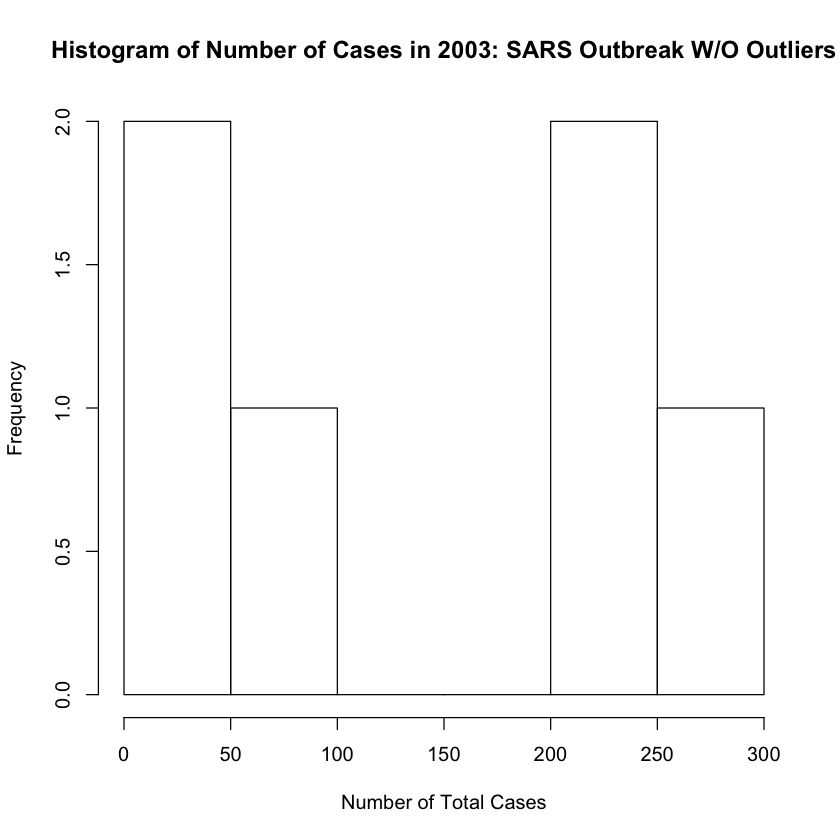

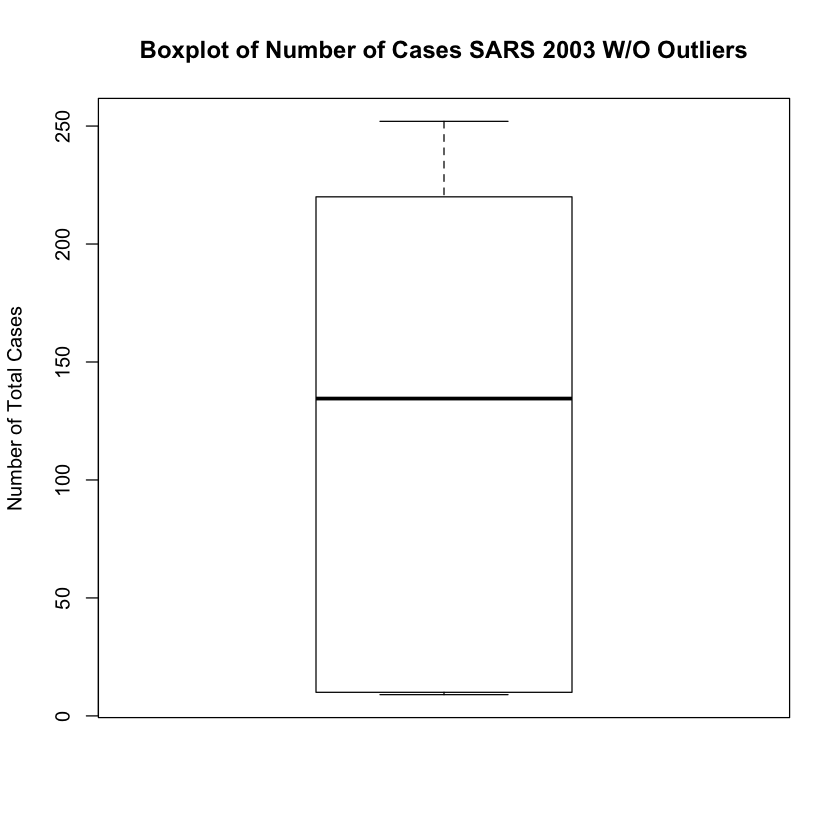

In [3]:
t2003_2 = c(cumulSC$Canada.2003, cumulSC$Germany.2003, cumulSC$Italy.2003, cumulSC$Singapore.2003, cumulSC$US.2003, cumulSC$Vietnam.2003)
hist(t2003_2, xlab ='Number of Total Cases', main = "Histogram of Number of Cases in 2003: SARS Outbreak W/O Outliers")
skew <- skewness(t2003_2)
cat("Skewness: ", skew)

favstats(t2003_2)
boxplot(t2003_2, ylab = "Number of Total Cases", main = "Boxplot of Number of Cases SARS 2003 W/O Outliers")

The skew is decreased almost completely. The distribution is almost completely normal. 

Skewness:  0.2142627

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,188,3562,62095,89905.5,140886,55729.14,55214.49,7,0


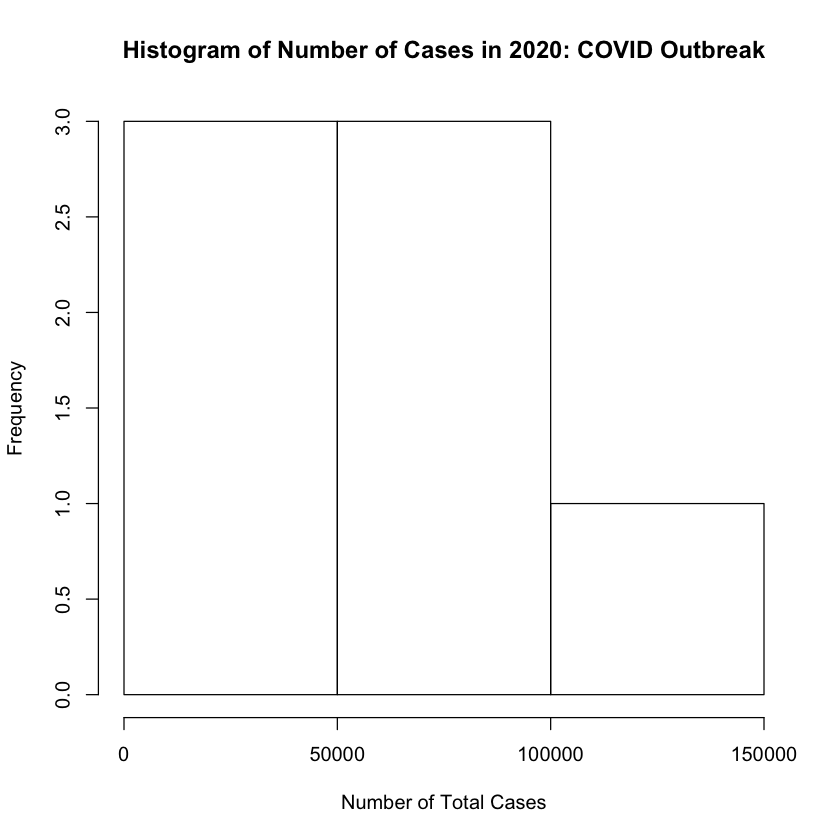

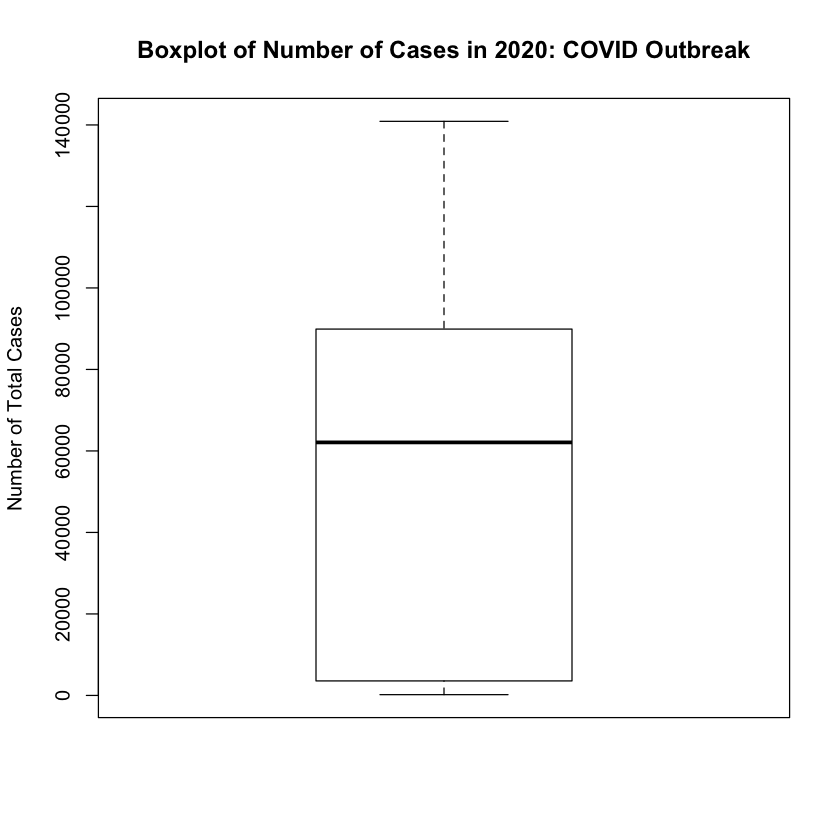

In [4]:
t2020 <- c(cumulSC$Canada.2020, cumulSC$Germany.2020, cumulSC$Italy.2020, cumulSC$Singapore.2020, cumulSC$US.2020, cumulSC$Vietnam.2020, cumulSC$China.2020)
hist(t2020, xlab ='Number of Total Cases', main = "Histogram of Number of Cases in 2020: COVID Outbreak")
skew <- skewness(t2020)
cat("Skewness: ", skew)

favstats(t2020)
boxplot(t2020, ylab = "Number of Total Cases", main = "Boxplot of Number of Cases in 2020: COVID Outbreak")

Distribution is positively skewed. The distribution is not normal. 

In [5]:
totDLD

X,Canada.2003,Germany.2003,Italy.2003,Singapore.2003,US.2003,Vietnam.2003,China.2003,Canada.2020,China.2020,Germany.2020,Italy.2020,Singapore.2020,US.2020,Vietnam.2020
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Total Deaths,38,0,0,32,0,5,646,64,3304,533,10779,3,2467,0


Skewness:  1.60474

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,0,0,5,35,646,103,239.9812,7,0


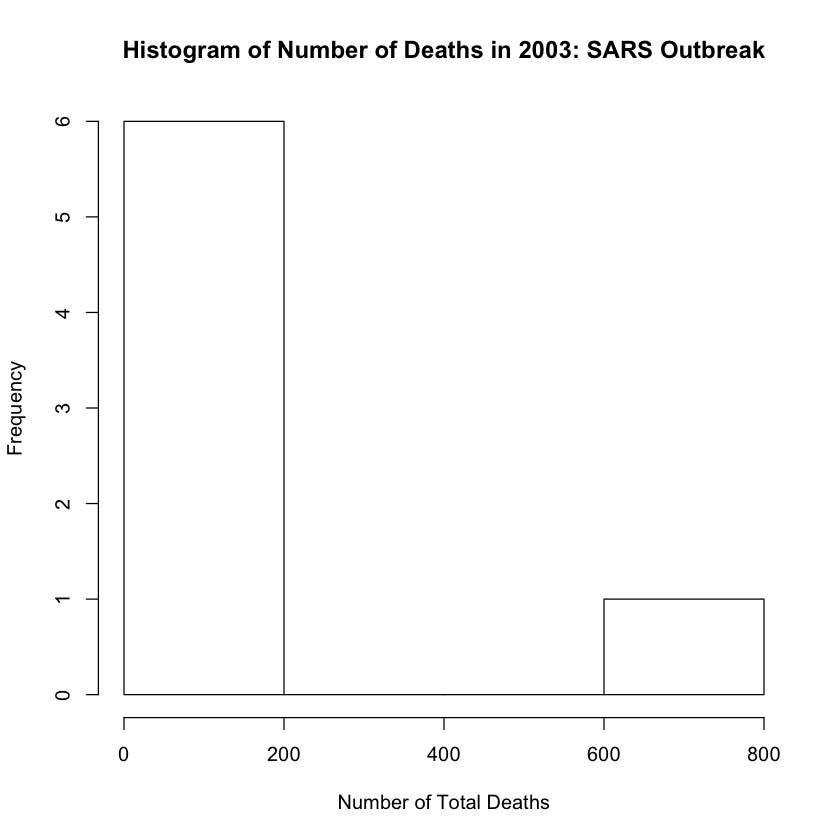

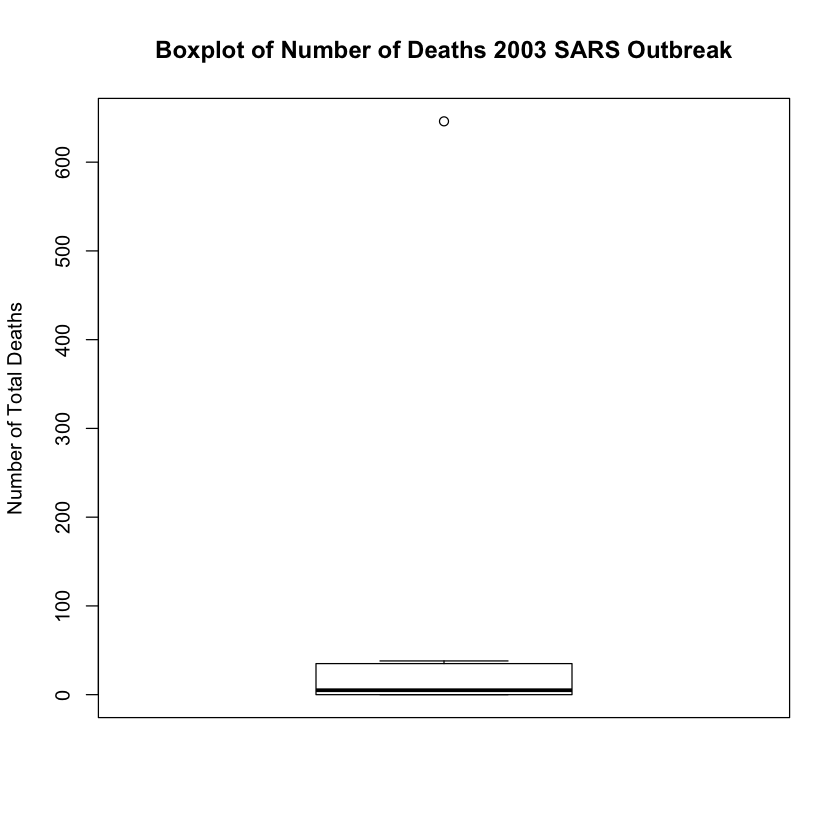

In [6]:
d2003 = c(totDLD$Canada.2003, totDLD$Germany.2003, totDLD$Italy.2003, totDLD$Singapore.2003, totDLD$US.2003, totDLD$Vietnam.2003, totDLD$China.2003)
hist(d2003, xlab ='Number of Total Deaths', main = "Histogram of Number of Deaths in 2003: SARS Outbreak")
skew <- skewness(d2003)
cat("Skewness: ", skew)

favstats(d2003)
boxplot(d2003, ylab = "Number of Total Deaths", main = "Boxplot of Number of Deaths 2003 SARS Outbreak")

China is an outlier. 

Skewness:  0.5380714

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,0,0,2.5,25.25,38,12.5,17.63803,6,0


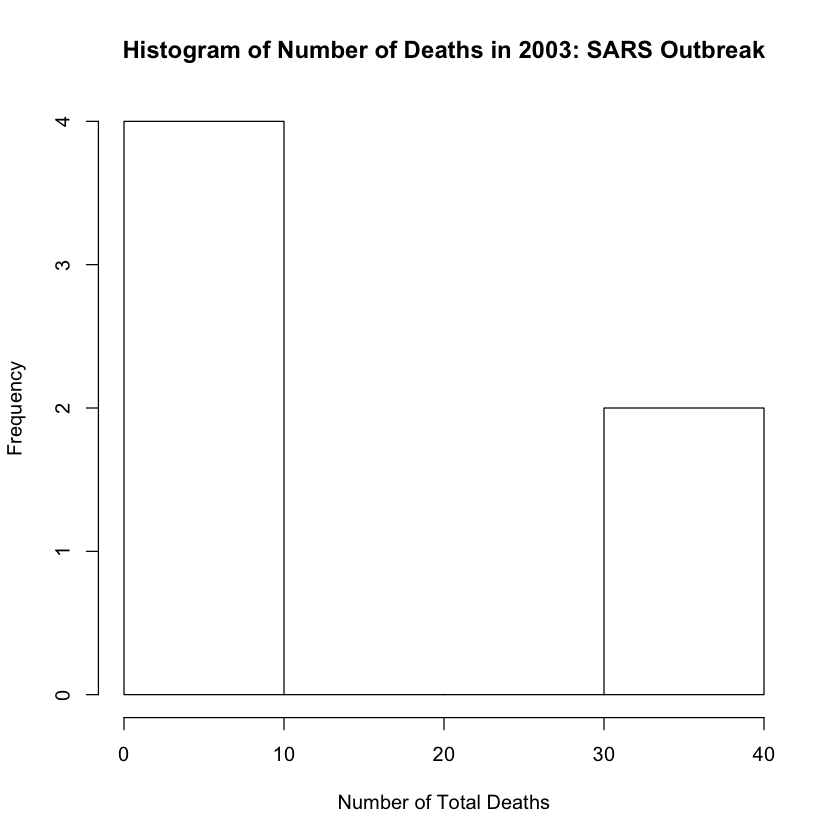

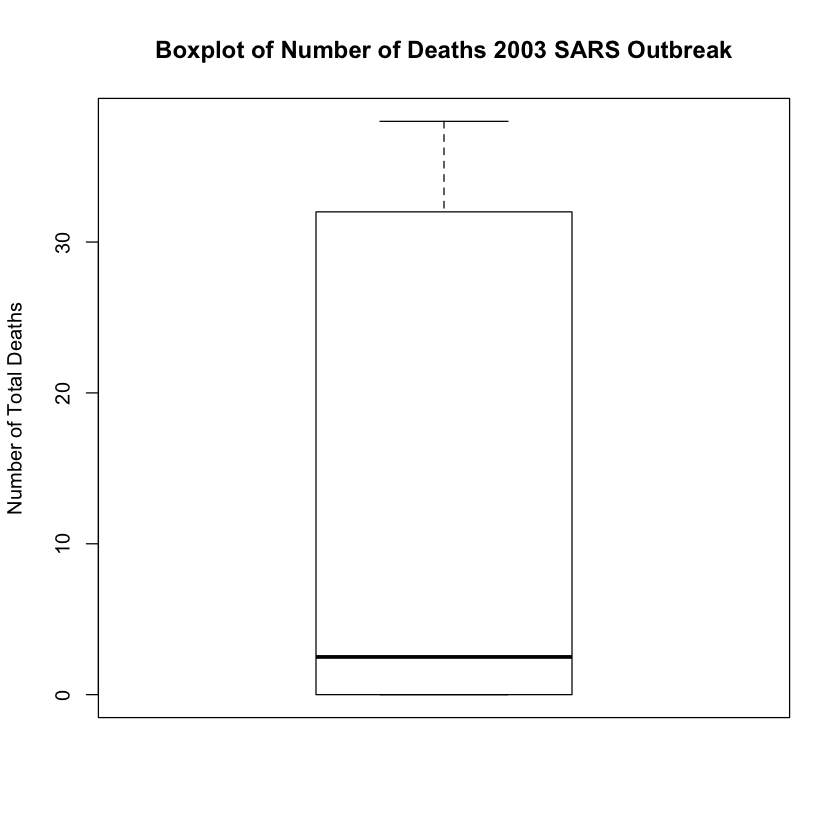

In [7]:
d2003 = c(totDLD$Canada.2003, totDLD$Germany.2003, totDLD$Italy.2003, totDLD$Singapore.2003, totDLD$US.2003, totDLD$Vietnam.2003)
hist(d2003, xlab ='Number of Total Deaths', main = "Histogram of Number of Deaths in 2003: SARS Outbreak")
skew <- skewness(d2003)
cat("Skewness: ", skew)

favstats(d2003)
boxplot(d2003, ylab = "Number of Total Deaths", main = "Boxplot of Number of Deaths 2003 SARS Outbreak")

The Deaths are still skewed. 

Skewness:  1.268456

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,0,33.5,533,2885.5,10779,2450,3904.272,7,0


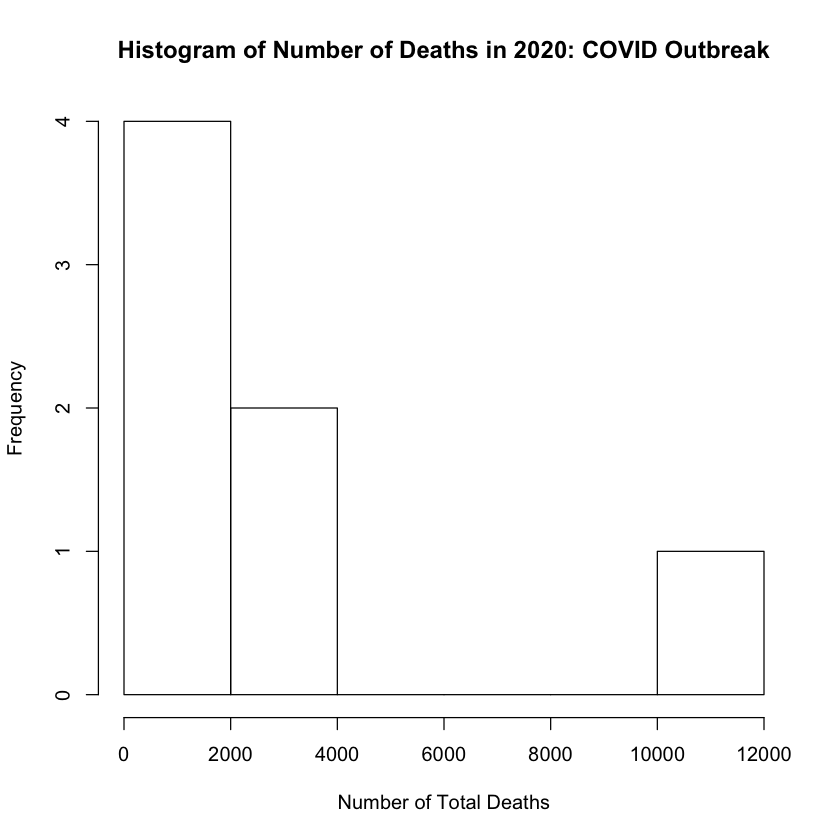

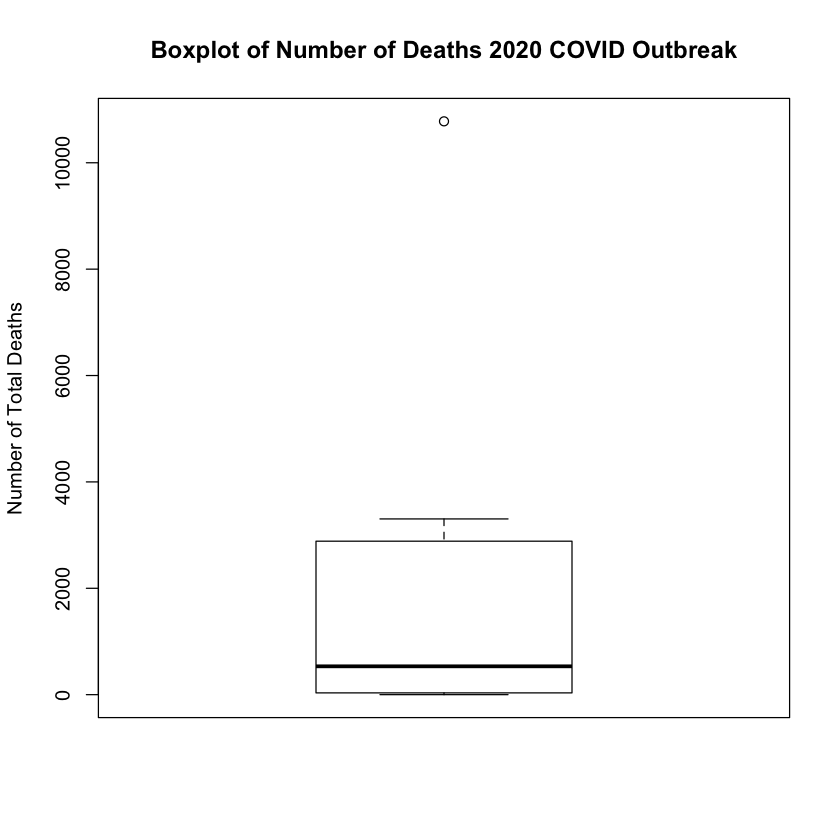

In [8]:
d2020 = c(totDLD$Canada.2020, totDLD$Germany.2020, totDLD$Italy.2020, totDLD$Singapore.2020, totDLD$US.2020, totDLD$Vietnam.2020, totDLD$China.2020)
hist(d2020, xlab ='Number of Total Deaths', main = "Histogram of Number of Deaths in 2020: COVID Outbreak")
skew <- skewness(d2020)
cat("Skewness: ", skew)

favstats(d2020)
boxplot(d2020, ylab = "Number of Total Deaths", main = "Boxplot of Number of Deaths 2020 COVID Outbreak")

Italy is an outlier. 

Skewness:  0.5740831

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,0,18.25,298.5,1983.5,3304,1061.833,1450.914,6,0


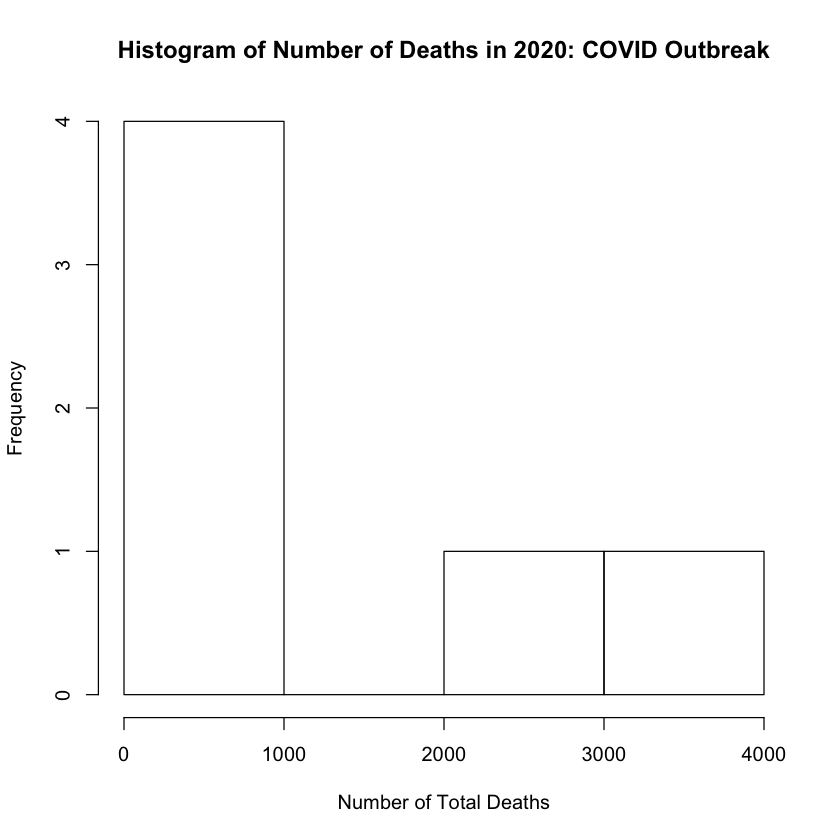

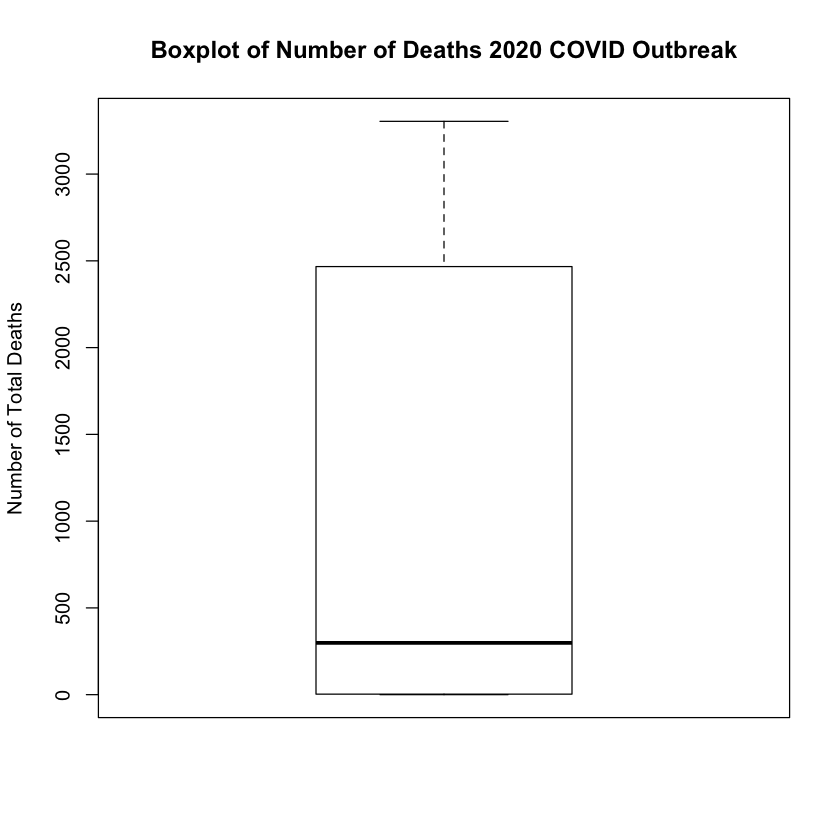

In [9]:
d2020 = c(totDLD$Canada.2020, totDLD$Germany.2020, totDLD$Singapore.2020, totDLD$US.2020, totDLD$Vietnam.2020, totDLD$China.2020)
hist(d2020, xlab ='Number of Total Deaths', main = "Histogram of Number of Deaths in 2020: COVID Outbreak")
skew <- skewness(d2020)
cat("Skewness: ", skew)

favstats(d2020)
boxplot(d2020, ylab = "Number of Total Deaths", main = "Boxplot of Number of Deaths 2020 COVID Outbreak")

Less skewed but still not normal. 

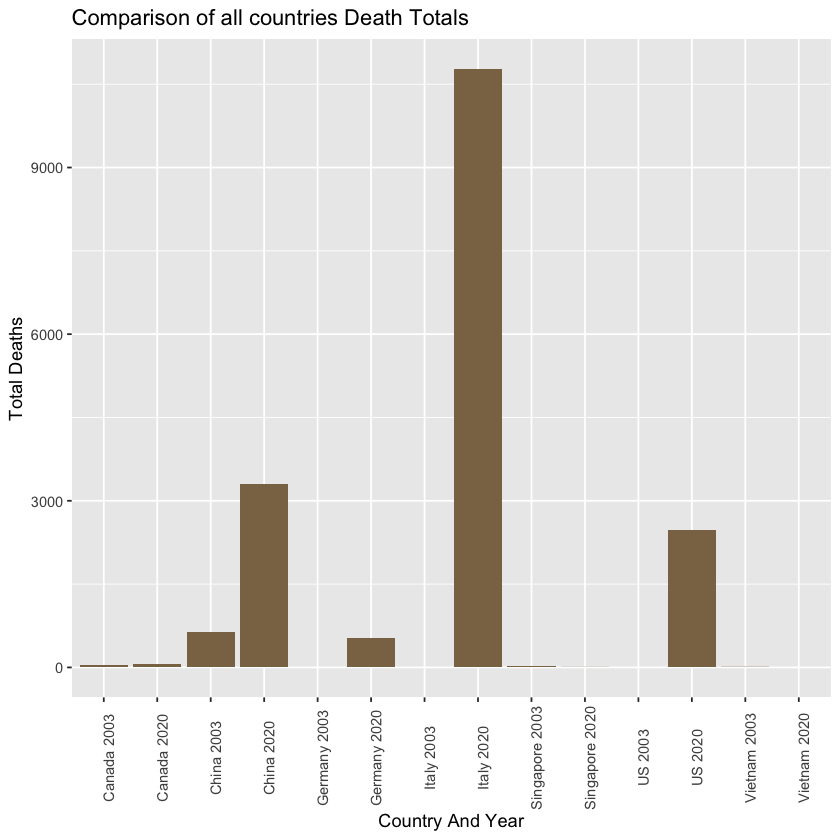

In [10]:
library(ggplot2)

data <- data.frame(CountryYear= c("Canada 2020", "Canada 2003", "Germany 2020", "Germany 2003", "Italy 2020", 
                                  "Italy 2003", "Singapore 2020", "Singapore 2003", "US 2020", "US 2003", 
                                  "Vietnam 2020", "Vietnam 2003", "China 2020", "China 2003"),  
                   Total=c(totDLD$Canada.2020, totDLD$Canada.2003, totDLD$Germany.2020, totDLD$Germany.2003,
                          totDLD$Italy.2020, totDLD$Italy.2003, totDLD$Singapore.2020, totDLD$Singapore.2003,
                          totDLD$US.2020, totDLD$US.2003, totDLD$Vietnam.2020, totDLD$Vietnam.2003,
                          totDLD$China.2020, totDLD$China.2003))

barplot <- ggplot(data, aes(x=CountryYear, y=Total)) + geom_bar(stat = "identity", fill = 'burlywood4') + 
                    ggtitle("Comparison of all countries Death Totals") + xlab("Country And Year") + ylab("Total Deaths") +
                    theme(axis.text.x = element_text(angle = 90))
barplot

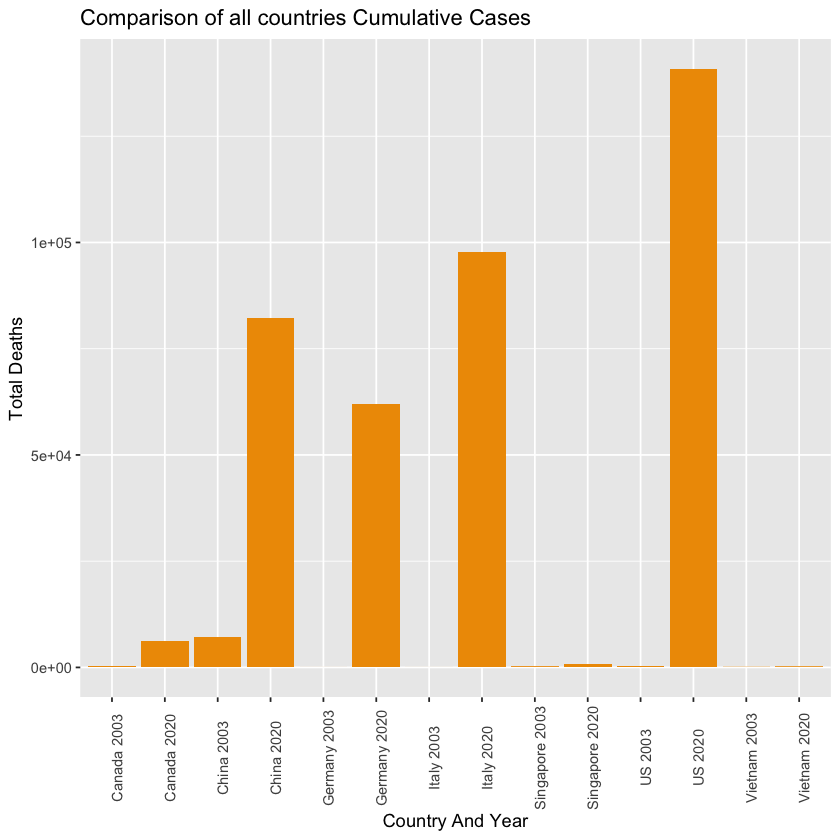

In [11]:
data <- data.frame(CountryYear= c("Canada 2020", "Canada 2003", "Germany 2020", "Germany 2003", "Italy 2020", 
                                  "Italy 2003", "Singapore 2020", "Singapore 2003", "US 2020", "US 2003", 
                                  "Vietnam 2020", "Vietnam 2003", "China 2020", "China 2003"),  
                   Total=c(cumulSC$Canada.2020, cumulSC$Canada.2003, cumulSC$Germany.2020, cumulSC$Germany.2003,
                          cumulSC$Italy.2020, cumulSC$Italy.2003, cumulSC$Singapore.2020, cumulSC$Singapore.2003,
                          cumulSC$US.2020, cumulSC$US.2003, cumulSC$Vietnam.2020, cumulSC$Vietnam.2003,
                          cumulSC$China.2020, cumulSC$China.2003))

barplot <- ggplot(data, aes(x=CountryYear, y=Total)) + geom_bar(stat = "identity", fill = 'orange2') + 
                    ggtitle("Comparison of all countries Cumulative Cases") + xlab("Country And Year") + ylab("Total Deaths") +
                    theme(axis.text.x = element_text(angle = 90))
barplot

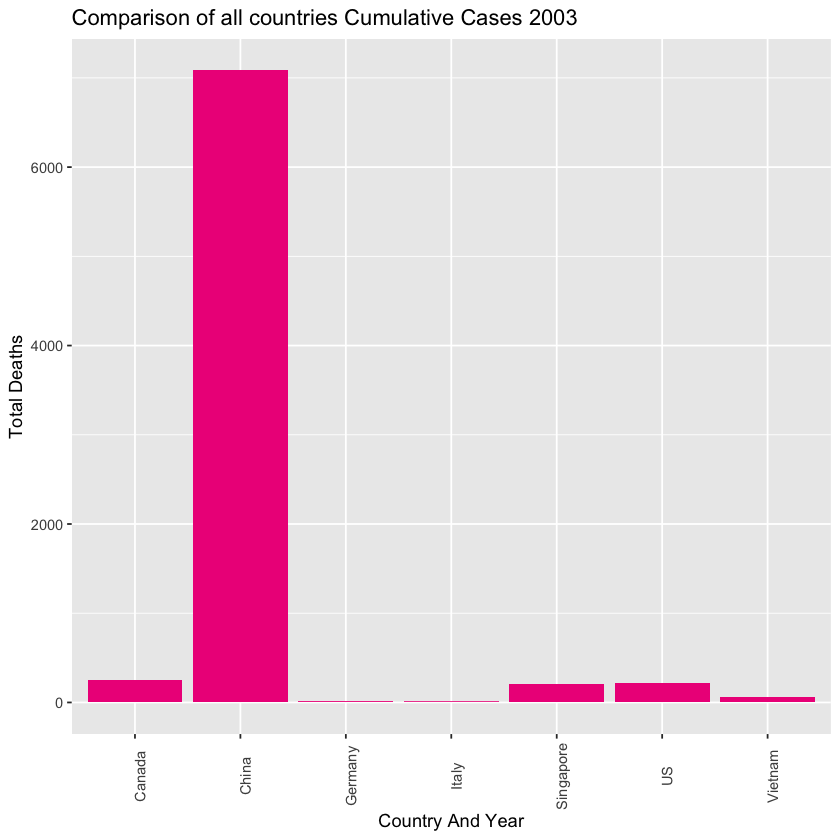

In [12]:
data <- data.frame(CountryYear= c("Canada", "Germany", "Italy", "Singapore", "US", "Vietnam", "China"),  
                   Total=c(cumulSC$Canada.2003, cumulSC$Germany.2003, cumulSC$Italy.2003, cumulSC$Singapore.2003,
                        cumulSC$US.2003, cumulSC$Vietnam.2003, cumulSC$China.2003))

barplot <- ggplot(data, aes(x=CountryYear, y=Total)) + geom_bar(stat = "identity", fill = 'deeppink2') + 
                    ggtitle("Comparison of all countries Cumulative Cases 2003") + xlab("Country And Year") + ylab("Total Deaths") +
                    theme(axis.text.x = element_text(angle = 90))
barplot

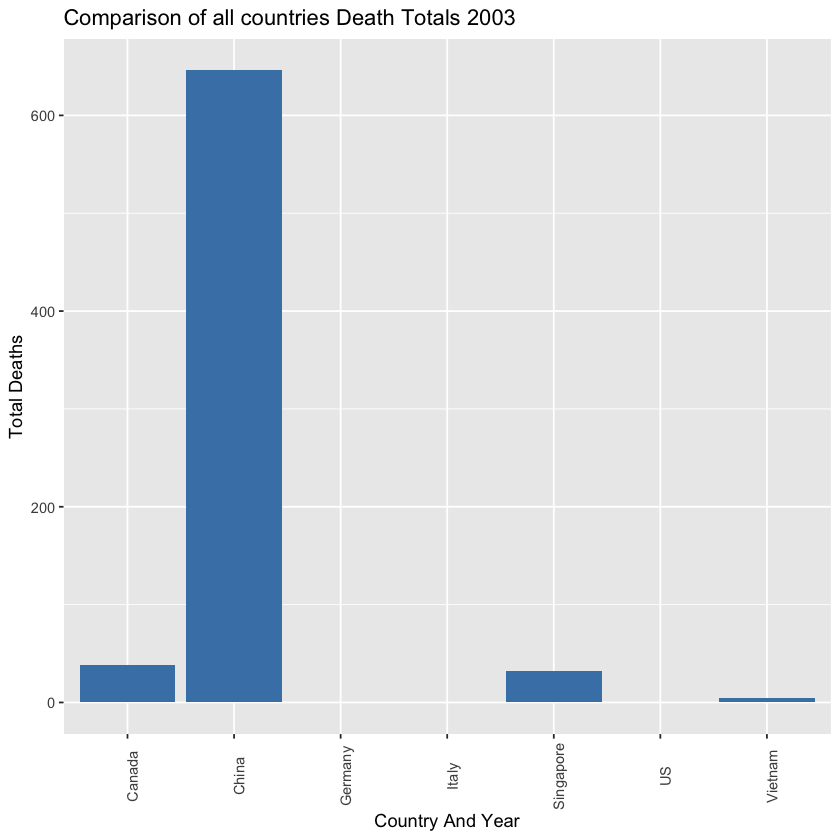

In [13]:
library(ggplot2)

data <- data.frame(CountryYear= c("Canada", "Germany", "Italy", "Singapore", "US", "Vietnam", "China"),  
                   Total=c(totDLD$Canada.2003, totDLD$Germany.2003, totDLD$Italy.2003, totDLD$Singapore.2003,
                           totDLD$US.2003, totDLD$Vietnam.2003, totDLD$China.2003))

barplot <- ggplot(data, aes(x=CountryYear, y=Total)) + geom_bar(stat = "identity", fill="steelblue") + 
                    ggtitle("Comparison of all countries Death Totals 2003") + xlab("Country And Year") + ylab("Total Deaths") +
                    theme(axis.text.x = element_text(angle = 90))
barplot

In [14]:
install.packages("pwr")
library(pwr)
install.packages("distr")

In [15]:
pwr.t.test(n = 96, d = 0.2, sig.level = 0.05, type = "paired", alternative = "greater")


     Paired t test power calculation 

              n = 96
              d = 0.2
      sig.level = 0.05
          power = 0.6181991
    alternative = greater

NOTE: n is number of *pairs*


The following t tests will have a 61.8% power. 

In [16]:
pwr.t.test(d=0.2, sig.level = 0.05, power = 0.8, type = "paired", alternative = "greater")


     Paired t test power calculation 

              n = 155.9256
              d = 0.2
      sig.level = 0.05
          power = 0.8
    alternative = greater

NOTE: n is number of *pairs*


155 samples is needed to have 0.8 power. 

In [17]:
ttest = t.test(dfSD$China, dfSD$Canada, alternative = "greater", paired = FALSE)
ttest


	Welch Two Sample t-test

data:  dfSD$China and dfSD$Canada
t = 14.221, df = 95.427, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 318.7531      Inf
sample estimates:
mean of x mean of y 
381.89583  20.98958 


China will recieve the most severe classification. 

In [18]:
ttest = t.test(dfSD$Canada, dfSD$Singapore, alternative = "greater", paired = FALSE)
ttest


	Welch Two Sample t-test

data:  dfSD$Canada and dfSD$Singapore
t = -0.22785, df = 189.98, p-value = 0.59
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -3.181406       Inf
sample estimates:
mean of x mean of y 
 20.98958  21.37500 


Canada and Singapore will be placed in the second most severe classification. The test indicates that there is no difference between them. 

In [19]:
ttest = t.test(dfSD$Singapore, dfSD$Vietnam, alternative = "greater", paired = FALSE)
ttest


	Welch Two Sample t-test

data:  dfSD$Singapore and dfSD$Vietnam
t = 14.056, df = 96.044, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 14.78915      Inf
sample estimates:
mean of x mean of y 
21.375000  4.604167 


Vietnam will be placed in the third most severe classification. 

In [20]:
ttest = t.test(dfSD$Vietnam, dfSD$United.States, alternative = "greater", paired = FALSE)
ttest


	Welch Two Sample t-test

data:  dfSD$Vietnam and dfSD$United.States
t = 52.197, df = 95, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 4.45765     Inf
sample estimates:
mean of x mean of y 
 4.604167  0.000000 


United States will be placed in the fourth most severe classification. 

In [21]:
ttest = t.test(dfSD$United.States, dfSD$Germany, alternative = "greater", paired = FALSE)
ttest


	Welch Two Sample t-test

data:  dfSD$United.States and dfSD$Germany
t = NaN, df = NaN, p-value = NA
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 NaN NaN
sample estimates:
mean of x mean of y 
        0         0 


Germany, Italy, and US did not experience a death during the outbreak. They will be placed in the fourth classification. 

In [31]:
dfW$classification <- c(2,1,4,4,2,4,3)
dfW

Member.State,Total.population..2002.,Annual.Growth.Rate.....1992.2002,Dependency.ratio.1992,Dependency.ratio.2002,Percentage.of.population.aged.60...1992.,Percentage.of.population.aged.60...2002.,Total.Fertility.Rate.1992,Total.Fertility.Rate.2002,LIFE.EXPECTANCY.AT.BIRTH.BOTH.SEXES.2002..YEARS.,⋯,PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002..per.1000.,PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002.Upper.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002.Lower.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.MALES.2002..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.MALES.2002.Upper.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.MALES.2002.Lower.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002.Upper.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002.Lower.Bound.Uncertainty.Interval..per.1000.,classification
<fct>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
Canada,31271.069,1.0,47,45,15.8,17.1,1.7,1.5,79.8,⋯,5,5,5,95,93,97,58,57,60,2
China,1302307.069,0.9,49,44,8.6,10.0,2.0,1.8,71.1,⋯,41,38,44,165,154,175,104,93,112,1
Germany,82414.408,0.2,46,48,20.5,24.0,1.3,1.3,78.7,⋯,4,4,4,118,114,123,60,59,62,4
Italy,57482.385,0.1,45,49,21.7,24.5,1.3,1.2,79.7,⋯,5,4,5,96,92,100,49,46,51,4
Singapore,4183.273,2.8,38,40,8.7,11.1,1.8,1.4,79.6,⋯,3,3,3,90,80,101,53,49,56,2
United States of America,291037.954,1.1,52,51,16.4,16.2,2.0,2.1,77.3,⋯,7,7,7,140,134,148,83,81,84,4
Vietnam,80278.208,1.5,76,59,7.3,7.4,3.4,2.3,69.6,⋯,33,28,37,200,184,215,129,117,140,3


In [44]:
install.packages("gapminder")
library(gapminder)
library(magrittr)


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract




In [47]:
dfW %<>% mutate_if(is.integer,as.numeric)
dfW

Member.State,Total.population..2002.,Annual.Growth.Rate.....1992.2002,Dependency.ratio.1992,Dependency.ratio.2002,Percentage.of.population.aged.60...1992.,Percentage.of.population.aged.60...2002.,Total.Fertility.Rate.1992,Total.Fertility.Rate.2002,LIFE.EXPECTANCY.AT.BIRTH.BOTH.SEXES.2002..YEARS.,⋯,PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002..per.1000.,PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002.Upper.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002.Lower.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.MALES.2002..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.MALES.2002.Upper.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.MALES.2002.Lower.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002.Upper.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002.Lower.Bound.Uncertainty.Interval..per.1000.,classification
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Canada,31271.069,1.0,47,45,15.8,17.1,1.7,1.5,79.8,⋯,5,5,5,95,93,97,58,57,60,2
China,1302307.069,0.9,49,44,8.6,10.0,2.0,1.8,71.1,⋯,41,38,44,165,154,175,104,93,112,1
Germany,82414.408,0.2,46,48,20.5,24.0,1.3,1.3,78.7,⋯,4,4,4,118,114,123,60,59,62,4
Italy,57482.385,0.1,45,49,21.7,24.5,1.3,1.2,79.7,⋯,5,4,5,96,92,100,49,46,51,4
Singapore,4183.273,2.8,38,40,8.7,11.1,1.8,1.4,79.6,⋯,3,3,3,90,80,101,53,49,56,2
United States of America,291037.954,1.1,52,51,16.4,16.2,2.0,2.1,77.3,⋯,7,7,7,140,134,148,83,81,84,4
Vietnam,80278.208,1.5,76,59,7.3,7.4,3.4,2.3,69.6,⋯,33,28,37,200,184,215,129,117,140,3


In [48]:
write.csv(dfW,"dfW.csv", row.names = TRUE)

In [1]:
library(caret)
library(psych)
library(randomForest)
library(varImp)

Loading required package: lattice

Loading required package: ggplot2


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:psych’:

    outlier


The following object is masked from ‘package:ggplot2’:

    margin


Loading required package: measures


Attaching package: ‘measures’


The following object is masked from ‘package:psych’:

    AUC


The following objects are masked from ‘package:caret’:

    MAE, RMSE


Loading required package: party

Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4

Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading require

In [25]:
set.seed(998)
indxTrain <- createDataPartition(y = dfW$classification,p = 0.8,list = FALSE)
training <- data1[indxTrain,] 
testing <- data1[-indxTrain,] 

data_1 <- dfW$classification
prop.table(table(data_1)) * 100

ERROR: Error in createDataPartition(y = dfW$classification, p = 0.8, list = FALSE): could not find function "createDataPartition"
